In [1]:
## conda environment Weather_Prediction

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

In [2]:
## get single level variables

PATH = os.path.join('..','Weather_Data','CAMS','2003','2003_single_level_34_variables.nc')
sl_34_variables = xr.open_dataset(PATH) ## single_level_34 variables CAMS data
sl_34_variables

<xarray.Dataset> Size: 1GB
Dimensions:     (valid_time: 2920, latitude: 34, longitude: 78)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 23kB 2003-01-01 ... 2003-12-31T21...
  * latitude    (latitude) float64 272B 49.25 48.5 47.75 ... 26.0 25.25 24.5
  * longitude   (longitude) float64 624B -124.8 -124.1 -123.3 ... -67.85 -67.1
Data variables: (12/34)
    u10         (valid_time, latitude, longitude) float32 31MB ...
    v10         (valid_time, latitude, longitude) float32 31MB ...
    d2m         (valid_time, latitude, longitude) float32 31MB ...
    t2m         (valid_time, latitude, longitude) float32 31MB ...
    bcaod550    (valid_time, latitude, longitude) float32 31MB ...
    duaod550    (valid_time, latitude, longitude) float32 31MB ...
    ...          ...
    tc_hno3     (valid_time, latitude, longitude) float32 31MB ...
    tcno2       (valid_time, latitude, longitude) float32 31MB ...
    tc_no       (valid_time, latitude, longitude) float32 31MB ...
    gtco3       (valid_time, latitude, longitude) float32 31MB ...
    tc_pan      (valid_time, latitude, longitude) float32 31MB ...
    tc_c3h8     (valid_time, latitude, longitude) float32 31MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-12T21:08 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
sl_34_variables=sl_34_variables.t2m -273.15  ## get 2 metre temperature and convert into celsius
sl_34_variables

<xarray.DataArray 't2m' (valid_time: 2920, latitude: 34, longitude: 78)> Size: 31MB
array([[[ 5.1684875,  4.823761 ,  4.08255  , ..., -8.413544 ,
         -8.175262 , -6.500458 ],
        [ 8.1753235,  6.0639954,  5.481964 , ..., -6.1479187,
         -6.5766296, -8.275848 ],
        [ 9.634308 ,  7.3735657,  6.631378 , ..., -4.971161 ,
         -5.828583 , -7.4809265],
        ...,
        [17.4263   , 17.343292 , 17.382355 , ..., 22.328644 ,
         22.034698 , 21.759308 ],
        [17.398956 , 17.299347 , 17.258331 , ..., 22.99759  ,
         22.731964 , 22.480011 ],
        [17.378448 , 17.302277 , 17.268097 , ..., 23.68216  ,
         23.387238 , 23.099152 ]],

       [[ 5.4091797,  5.086914 ,  4.3095703, ..., -7.283203 ,
         -7.0966797, -5.442383 ],
        [ 8.256836 ,  5.939453 ,  5.4003906, ..., -4.34375  ,
         -4.791992 , -6.573242 ],
        [ 9.517578 ,  6.921875 ,  5.2978516, ..., -2.4414062,
         -2.961914 , -4.7314453],
...
        [17.931885 , 17.992432 , 18.00708  , ..., 21.94458  ,
         21.87622  , 21.702393 ],
        [18.514893 , 18.604736 , 18.537354 , ..., 21.840088 ,
         21.837158 , 21.683838 ],
        [18.744385 , 18.760986 , 18.63208  , ..., 21.870361 ,
         21.88794  , 21.874268 ]],

       [[ 2.8537598,  1.7043457,  1.1066895, ..., -9.684326 ,
         -9.030029 , -7.8728027],
        [ 3.0549316,  2.6594238,  2.4699707, ..., -8.350342 ,
         -8.041748 , -8.64917  ],
        [ 4.552002 ,  4.1555176,  4.3615723, ..., -6.3015137,
         -7.36792  , -7.8864746],
        ...,
        [17.714111 , 17.71997  , 17.639893 , ..., 22.264893 ,
         22.206299 , 22.050049 ],
        [18.147705 , 18.16919  , 18.263916 , ..., 22.243408 ,
         22.149658 , 21.994385 ],
        [18.614502 , 18.648682 , 18.753174 , ..., 22.17212  ,
         22.052979 , 21.948486 ]]], shape=(2920, 34, 78), dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 23kB 2003-01-01 ... 2003-12-31T21...
  * latitude    (latitude) float64 272B 49.25 48.5 47.75 ... 26.0 25.25 24.5
  * longitude   (longitude) float64 624B -124.8 -124.1 -123.3 ... -67.85 -67.1

In [4]:
## resample the data to 1 year average

year_avg_sl_34 = sl_34_variables.resample(valid_time='1YE').mean(dim='valid_time')
year_avg_sl_34

<xarray.DataArray 't2m' (valid_time: 1, latitude: 34, longitude: 78)> Size: 11kB
array([[[ 9.476328 ,  9.622229 ,  9.642875 , ...,  2.578138 ,
          2.5876613,  2.7817173],
        [ 9.706336 ,  9.538678 ,  9.946908 , ...,  3.3368416,
          3.1290832,  2.7705154],
        [10.030369 ,  9.760399 , 10.506964 , ...,  3.4931874,
          3.1205142,  2.871184 ],
        ...,
        [16.860619 , 16.7764   , 16.719938 , ..., 23.807543 ,
         23.784565 , 23.76212  ],
        [17.139978 , 17.058762 , 17.014145 , ..., 24.132914 ,
         24.112152 , 24.08194  ],
        [17.399662 , 17.333422 , 17.293047 , ..., 24.40993  ,
         24.383224 , 24.342775 ]]], shape=(1, 34, 78), dtype=float32)
Coordinates:
  * latitude    (latitude) float64 272B 49.25 48.5 47.75 ... 26.0 25.25 24.5
  * longitude   (longitude) float64 624B -124.8 -124.1 -123.3 ... -67.85 -67.1
  * valid_time  (valid_time) datetime64[ns] 8B 2003-12-31

In [5]:
year_avg_sl_34.to_dataframe() ## note that even though the valid time says, 2010-12-31, its the 1 year average

t2m
valid_time latitude longitude           
2003-12-31 49.25    -124.85     9.476328
                    -124.10     9.622229
                    -123.35     9.642875
                    -122.60     8.275770
                    -121.85     6.295341
...                                  ...
           24.50    -70.10     24.461908
                    -69.35     24.441626
                    -68.60     24.409929
                    -67.85     24.383224
                    -67.10     24.342775

[2652 rows x 1 columns]

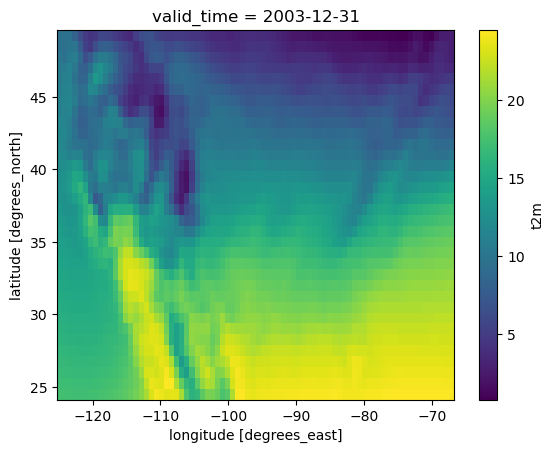

In [6]:
year_avg_sl_34.plot()

In [7]:
## get the state shapefile

SHAPE_PATH = os.path.join('..','Shapefiles','state_shapefile','cb_2018_us_state_500k.shp')
state_shape = gpd.read_file(SHAPE_PATH)

print('The CRS of the SHAPE file is:', state_shape.crs)

## include only contiguous shapefile

remove_state = ['Alaska', 'District of Columbia', 'American Samoa', 'United States Virgin Islands', 'Hawaii', 'Guam', 
                  'Commonwealth of the Northern Mariana Islands', 'Puerto Rico' ]

# Remove rows where the 'NAME' column contains any value from strings
state_shape = state_shape[~state_shape['NAME'].isin(remove_state)]
state_shape

The CRS of the SHAPE file is: EPSG:4269


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


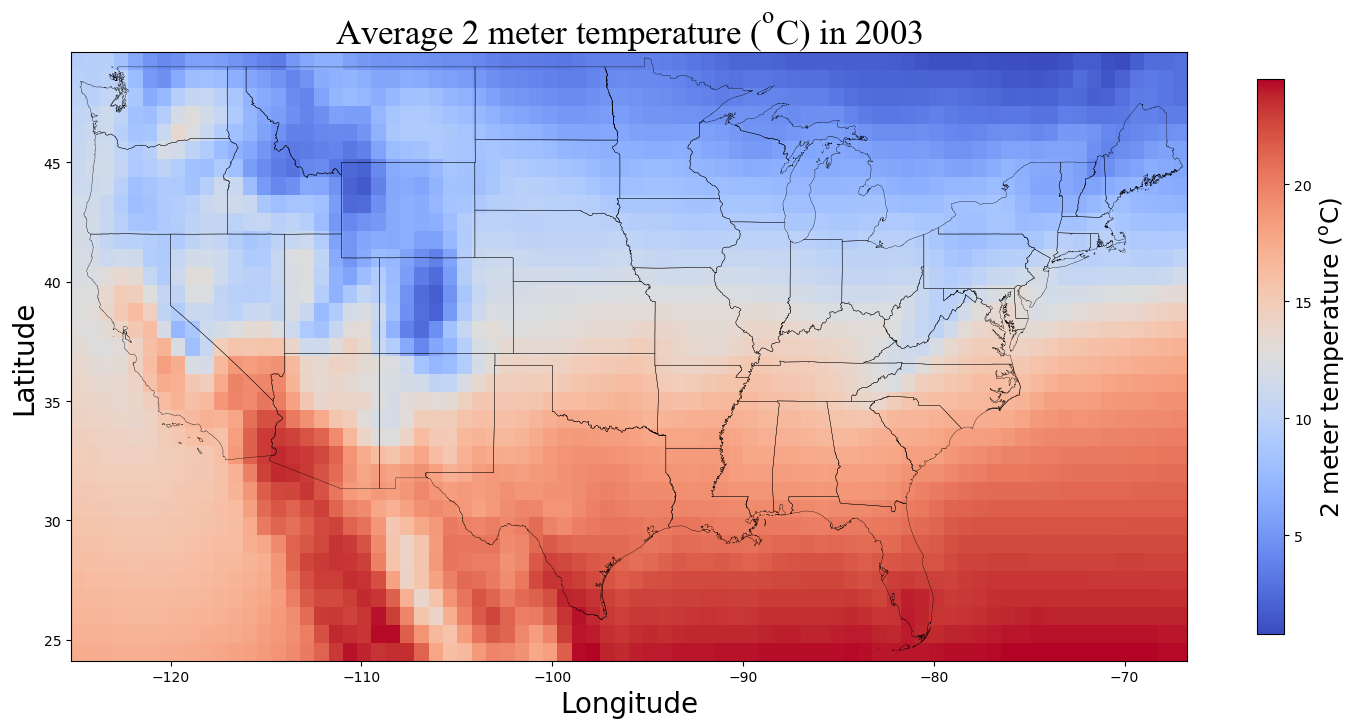

In [8]:
fig, ax= plt.subplots(1,figsize=(18,12) )

cbar_kwargs = {'shrink':0.6}


plot_obj = year_avg_sl_34.plot(cmap='coolwarm',cbar_kwargs=cbar_kwargs)
cbar = plot_obj.colorbar

# Change the font size of the colorbar label
cbar.set_label('2 meter temperature ($\\mathregular{^o}$C)', size=18) 
state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

# add a title and annotation
hfont = {'fontname':'Times New Roman'}
plt.title('Average 2 meter temperature ($\\mathregular{^o}$C) in 2003',**hfont,
                     fontdict={'fontsize': '25', 'fontweight' : '1'})
plt.ylabel('Latitude', fontsize = 20)
plt.xlabel('Longitude', fontsize = 20)
plt.savefig('cams_actual_plot.png')

In [9]:
year_avg=year_avg_sl_34

In [10]:
## use county shapefile from 2010 as the shapefile before 2008 could not be found
SHAPE_PATH=os.path.join('..','Shapefiles','county_shapefiles','2010_county_shapefile','gz_2010_us_050_00_500k.shp')
county_gdf = gpd.read_file(SHAPE_PATH)
county_gdf

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01029,01,029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873..."
1,0500000US01031,01,031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619..."
2,0500000US01037,01,037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090..."
3,0500000US01039,01,039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994..."
4,0500000US01041,01,041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68046, -86.14711 31.663..."
...,...,...,...,...,...,...,...
3216,0500000US72131,72,131,San Sebastián,Muno,70.423,"POLYGON ((-66.90748 18.25314, -66.90739 18.253..."
3217,0500000US72133,72,133,Santa Isabel,Muno,34.023,"POLYGON ((-66.37968 17.94398, -66.38029 17.943..."
3218,0500000US72137,72,137,Toa Baja,Muno,23.241,"MULTIPOLYGON (((-66.13957 18.46232, -66.13956 ..."
3219,0500000US72139,72,139,Trujillo Alto,Muno,20.764,"POLYGON ((-66.02917 18.3759, -66.02828 18.3768..."


In [11]:
geometry_column=county_gdf['geometry']
geometry_column
lat_lon=geometry_column.get_coordinates(index_parts=True)
lat_lon

x          y
0    0   -85.388717  33.913044
     1   -85.380885  33.873508
     2   -85.379455  33.866291
     3   -85.377426  33.856047
     4   -85.376403  33.850656
...             ...        ...
3220 202 -66.833718  17.989763
     203 -66.835282  17.988274
     204 -66.835429  17.986323
     205 -66.836682  17.965971
     206 -66.852288  17.955004

[837022 rows x 2 columns]

In [12]:
def single_county(var):
    
    ''' Function to interpolate the values in a single county by taking a 100 or less latitude and longitude pair.  
        Args:
        --------
             var (int): The index of the county in the shapefile.

        Returns:
        --------
            county_df: Dataframe consisting the values of the variables interpolated in the county.
    ''' 
    longitude= lat_lon.loc[(var), 'x']  # get the longitude 
    extract_val=len(longitude)        ## find number of longitude that a shapfile has

    ## if number of longitude or latitude is less than 100, that many lat-lon pairs will be extracted, if not, a 100 values
    if extract_val < 100:
        extract_val=extract_val
    else:
        extract_val=100

    longitude=longitude[:extract_val]  ## extract first 100 values or values less than 100
    
    latitude= lat_lon.loc[(var), 'y']   # get the latitude values
    latitude=latitude[:extract_val]    ## extract first 100 values or values less than 100

    lat_list=latitude.tolist()
    lon_list=longitude.tolist()

    ## find the corresponding values of the variables in the finer grid

    year_avg_finer= year_avg.interp(longitude=lon_list, latitude=lat_list)
    year_avg_finer
    
    df = year_avg_finer.squeeze(dim="valid_time") ## remove the valid_time dimension, note that this will appear as a column
                                                  ## after removed

    ## get only the 100 (or less) pair of latitude and longitude from the lat and lon list from the 100,000 (or less) rows
    get_vals=[]

    for i in range(0, extract_val):
        row=df.isel(latitude=[i], longitude=[i])
        row_df=row.to_dataframe()
        get_vals.append(row_df)

    initial_df=pd.concat(get_vals)
    initial_df=initial_df.drop('valid_time', axis=1) ## remove the valid_time column 
    
    mean=initial_df.mean() ## find the average of the 100 (or less) values
    average_df = pd.DataFrame(mean).T 

    county_df= average_df.convert_dtypes() ## the dtype of the mean values will be object, so convert that to float
    county_df
    
    return county_df

In [13]:
%%time

## include all counties

df_list=[]

for i in range(0,3233): ## A total of 3233 counties. index in shape file starts from 0 and ends in 3232
    try:
        df_list.append(single_county(i))
    except:
        pass

CPU times: total: 5min 5s
Wall time: 5min 13s


In [14]:
concatenate_df=pd.concat(df_list)
final_df=concatenate_df.reset_index(drop=True)
final_df

,t2m
0,16.567634
1,18.524874
2,17.442181
3,18.691437
4,18.415667
...,...
3216,<NA>
3217,<NA>
3218,<NA>
3219,<NA>


In [15]:
## lets first create a fips column in the original shape file
## lets create the fips column in the dataframe which is the sum of state and county both as dtype string.
## Note: not a numerical sum
## This step is necessary because there can be several counties with idential names. 

county_gdf['fips']=county_gdf['STATE'] + county_gdf['COUNTY']
county_gdf.dtypes
## convert the data type
county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)
county_gdf.dtypes

county_gdf = county_gdf.drop(['STATE','COUNTY'], axis=1)
county_gdf

,GEO_ID,NAME,LSAD,CENSUSAREA,geometry,fips
0,0500000US01029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",1029
1,0500000US01031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619...",1031
2,0500000US01037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090...",1037
3,0500000US01039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994...",1039
4,0500000US01041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68046, -86.14711 31.663...",1041
...,...,...,...,...,...,...
3216,0500000US72131,San Sebastián,Muno,70.423,"POLYGON ((-66.90748 18.25314, -66.90739 18.253...",72131
3217,0500000US72133,Santa Isabel,Muno,34.023,"POLYGON ((-66.37968 17.94398, -66.38029 17.943...",72133
3218,0500000US72137,Toa Baja,Muno,23.241,"MULTIPOLYGON (((-66.13957 18.46232, -66.13956 ...",72137
3219,0500000US72139,Trujillo Alto,Muno,20.764,"POLYGON ((-66.02917 18.3759, -66.02828 18.3768...",72139


In [16]:
merged_df=pd.merge(county_gdf, final_df, left_index=True, right_index=True)
merged_df

,GEO_ID,NAME,LSAD,CENSUSAREA,geometry,fips,t2m
0,0500000US01029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",1029,16.567634
1,0500000US01031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619...",1031,18.524874
2,0500000US01037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090...",1037,17.442181
3,0500000US01039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994...",1039,18.691437
4,0500000US01041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68046, -86.14711 31.663...",1041,18.415667
...,...,...,...,...,...,...,...
3216,0500000US72131,San Sebastián,Muno,70.423,"POLYGON ((-66.90748 18.25314, -66.90739 18.253...",72131,<NA>
3217,0500000US72133,Santa Isabel,Muno,34.023,"POLYGON ((-66.37968 17.94398, -66.38029 17.943...",72133,<NA>
3218,0500000US72137,Toa Baja,Muno,23.241,"MULTIPOLYGON (((-66.13957 18.46232, -66.13956 ...",72137,<NA>
3219,0500000US72139,Trujillo Alto,Muno,20.764,"POLYGON ((-66.02917 18.3759, -66.02828 18.3768...",72139,<NA>


In [17]:
county_df=merged_df.dropna()
county_df

,GEO_ID,NAME,LSAD,CENSUSAREA,geometry,fips,t2m
0,0500000US01029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",1029,16.567634
1,0500000US01031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619...",1031,18.524874
2,0500000US01037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090...",1037,17.442181
3,0500000US01039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994...",1039,18.691437
4,0500000US01041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68046, -86.14711 31.663...",1041,18.415667
...,...,...,...,...,...,...,...
3138,0500000US56027,Niobrara,County,2626.037,"POLYGON ((-104.05298 42.85955, -104.05286 42.7...",56027,8.850698
3139,0500000US56031,Platte,County,2084.208,"POLYGON ((-104.77417 42.60996, -104.76422 42.6...",56031,8.567053
3140,0500000US56037,Sweetwater,County,10426.649,"POLYGON ((-109.05008 41.00066, -109.17368 41.0...",56037,6.266737
3141,0500000US56043,Washakie,County,2238.549,"POLYGON ((-107.12892 43.99455, -107.12797 43.9...",56043,6.292998


In [18]:
type(county_df)

geopandas.geodataframe.GeoDataFrame

In [19]:
gpd_df=county_df

In [20]:
county_df.dtypes

GEO_ID          object
NAME            object
LSAD            object
CENSUSAREA     float64
geometry      geometry
fips             int64
t2m            Float64
dtype: object

In [21]:
county_df['t2m'] = county_df['t2m'].astype('int32')

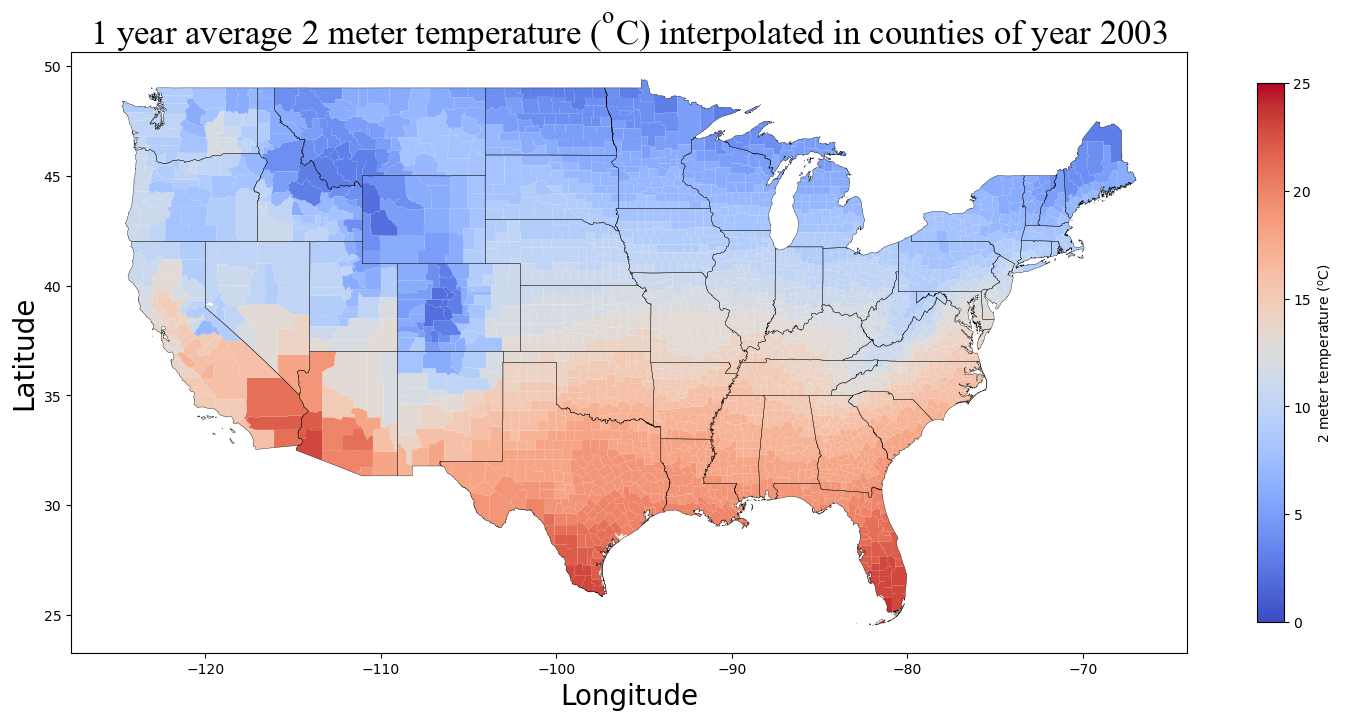

In [22]:
fig, ax = plt.subplots(1, figsize=(18, 14))

## plot the county shape file
county_df.plot(ax=ax, cmap='coolwarm', column='t2m', legend=True,
               legend_kwds={"label": "2 meter temperature ($\\mathregular{^o}$C)", 
                                                                              'shrink':0.5 }, vmin=0, vmax=25)

state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)
# add a title and annotation
hfont = {'fontname':'Times New Roman'}
plt.title('1 year average 2 meter temperature ($\\mathregular{^o}$C) interpolated in counties of year 2003',**hfont,
                     fontdict={'fontsize': '25', 'fontweight' : '1'})
plt.ylabel('Latitude', fontsize = 20)
plt.xlabel('Longitude', fontsize = 20)
plt.savefig('interpolated_plot.png')